In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [4]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

training_images, testing_images = training_images/255, testing_images/255 #getting pixels in range of 0 to 1

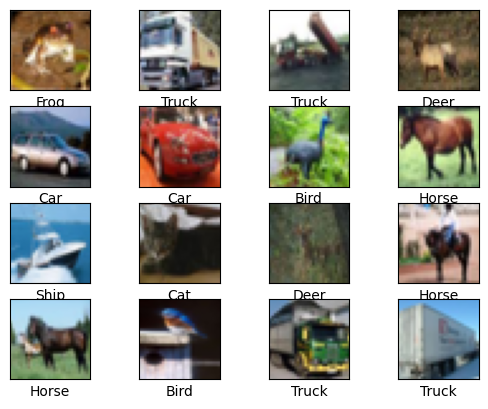

In [5]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'] #label dataset

for i in range(16):
    plt.subplot(4,4,i+1) #4x4 grid, each iteration we choose a grid to place the image
    plt.xticks([])
    plt.yticks([])# so that we don't have any coordinate system
    plt.imshow(training_images[i], cmap=plt.cm.binary) #shows training image, we'll use a binary color map here
    plt.xlabel(class_names[training_labels[i][0]]) #below each image we'll have a label, they'll be the class_names


plt.show()

In [4]:
training_images=training_images[:20000]#pick first 20k training examples. If you have a fast PC train on the entire dataset.
training_labels=training_labels[:20000]
testing_images=testing_images[:4000]#pick first 4k testing examples.
testing_labels=testing_labels[:4000]

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape= (32,32,3))) #convolutional layer, 32 neurons, 3x3 matrix, activation function, input shape is 32 times 32 pixels resolution and 3 color channels.
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))#A convolutional layer filters for features in an image.
model.add(layers.MaxPooling2D((2,2)))#max pooling layer reduces the image to the essential information
model.add(layers.Conv2D(64, (3,3), activation='relu')) #we repeat convo and pooling
model.add(layers.Flatten())#flatten the layer
model.add(layers.Dense(64, activation='relu')) #put a dense layer of complexity between flatten and dense layer which is the output layer
model.add(layers.Dense(10, activation='softmax'))#scaling the result in output layer

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images,testing_labels))

loss, accuracy = model.evaluate(testing_images,testing_labels)
print(f"loss:{loss}")
print(f"Accuracy:{accuracy}")


Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.5340 - accuracy: 0.4423 - val_loss: 1.2953 - val_accuracy: 0.5339
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1498 - accuracy: 0.5901 - val_loss: 1.0815 - val_accuracy: 0.6215
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9958 - accuracy: 0.6482 - val_loss: 0.9894 - val_accuracy: 0.6491
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9005 - accuracy: 0.6819 - val_loss: 0.9659 - val_accuracy: 0.6617
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8330 - accuracy: 0.7046 - val_loss: 0.9094 - val_accuracy: 0.6844
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7762 - accuracy: 0.7287 - val_loss: 0.8764 - val_accuracy: 0.6946
Epoch 7/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7287 - accuracy: 0.7429 - val_loss: 0.8577 - val

In [13]:
model.save('image_classifier.model')

INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [14]:
model=models.load_model('image_classifier.model')

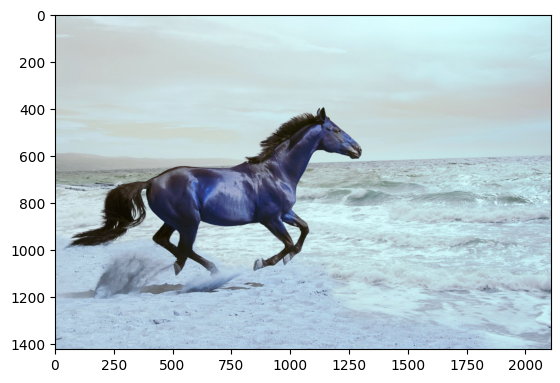

ValueError: in user code:

    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2381, in predict_step
        return self(x, training=False)
    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Affan.Ahmed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 32, 32, 3), found shape=(None, 1421, 2109, 3)


In [16]:
# Load the image
img = cv.imread('horse.jpg')

# Check if the image is loaded properly
if img is None:
    print("Error: The image did not load.")
else:
    # Assuming the model has been trained on images in BGR format
    # If the model expects RGB, uncomment the next line
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Show the image without a colormap
    plt.imshow(img)
    plt.show()

    # Assuming model is already loaded and model.predict expects an array of images
    # Preprocess the image as the model expects (e.g., resize, scale, etc.)
    # Here we simply normalize the pixel values to [0,1]
    img_processed = np.array([img / 255])

    # Make a prediction
    prediction = model.predict(img_processed)
    index = np.argmax(prediction)

    # Assuming class_names is a list of class names in the order the model outputs
    print(f'Prediction is {class_names[index]}')